# First import
## Basic

In [1]:
import pandas as pd
import numpy as np

## Visualize

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import seaborn as sns

## Data Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Shuffle arrays or sparse matrices in a consistent way
from sklearn.utils import shuffle
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

## Feature Preprocessing

In [5]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
from sklearn.decomposition import PCA

## Machine Learning Method
### Classifier

In [6]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.linear_model import Lasso

In [9]:
from sklearn.tree import ExtraTreeClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import xgboost as xgb

### Classifier - Ensmble

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

## Validation

In [ ]:
from sklearn.model_selection import validation_curve
# plot_learning_curve(estimator, "LinserSVC", X, y, cv = 10, train_sizes=np.linspace(0.2, 1.0, 5))

In [ ]:
from sklearn import metrics
# from sklearn.metrics import accuracy_score, log_loss, f1_score
# print(metrics.classification_report(y_test, learner.predict(X_test_std)))
# print(metrics.confusion_matrix(y_test, learner.predict(X_test_std)))
# print('各變項參數:', learner.coef_)
# print("MSE: %.2f" % np.mean((learner.predict(X_test_std) - y_test) ** 2))
# print("R Square:",learner.score(X_test_std,y_test))

In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.learning_curve import learning_curve

# 1. Load Data

In [12]:
# C:\Users\poduo\Anaconda3_JupyterNB\python_textbook_practice\Kaggle_Human Activity Recognition with Smartphones\data
addr_train = "../Kaggle_Human Activity Recognition with Smartphones/data/train.csv"
addr_test = "../Kaggle_Human Activity Recognition with Smartphones/data/test.csv"

train = pd.read_csv(addr_train)
test = pd.read_csv(addr_test)

ori_train = train.copy()
ori_test = test.copy()

# full_data = [train, test]

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [15]:
# pd.set_option('display.height', 1000)
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 600)
# pd.set_option('display.width', 1000)
train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [16]:
all_colums_list = list(train)
all_colums_list

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [17]:
features = train.iloc[:, 0:561]
labels = train['Activity']

In [18]:
X_test = test.iloc[:, 0:561]
y_test = test['Activity']

In [19]:
features.shape

(7352, 561)

In [20]:
# 後面好像沒用到
encoder = LabelEncoder()
encoder.fit(labels)
Label_encode = encoder.transform(labels)

Label_encode

array([2, 2, 2, ..., 5, 5, 5], dtype=int64)

### train_test_split

In [21]:
X_train, Xv_test, y_train, yv_test = train_test_split(features, labels, test_size = 0.3)

In [22]:
X_train.shape

(5146, 561)

In [23]:
y_train.shape

(5146,)

In [24]:
Xv_test.shape

(2206, 561)

In [25]:
yv_test.shape

(2206,)

### StandardScaler
[doc](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [26]:
std  = StandardScaler()
X_train_std = std.fit_transform(X_train)
Xv_test_std = std.transform(Xv_test)
X_test_std = std.transform(X_test)

# 2. Feature Engineering

### FeatureSelection：SelectFromModel
#### L1-base

l1 \*\*\* 

Before std, features_lsvc.shape is 
0221-82、
0314-86、91

After std, features_lsvc_std.shape is 
0221-161、
0314-168、169

In [27]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
model_lsvc = SelectFromModel(lsvc, prefit=True) 
features_lsvc = model_lsvc.transform(X_train)
print(features_lsvc.shape)

(5146, 91)


In [28]:
lsvc2 = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train_std, y_train)
model_lsvc2 = SelectFromModel(lsvc2, prefit=True) 
features_lsvc2 = model_lsvc2.transform(X_train_std)
print(features_lsvc2.shape)

(5146, 169)


l2

Before std, features_lgst_lib.shape is 
0314-39、40

After std, features_lgst_lib2.shape is 
0314-80、79

In [29]:
# solver= defalt
lgst_lib = LogisticRegression(penalty='l1', dual=False, tol=1e-6, C=0.01,
                          fit_intercept=True, max_iter=100,
                          multi_class='ovr', warm_start=False).fit(X_train, y_train)
model_lgst_lib = SelectFromModel(lgst_lib, prefit=True)
features_lgst_lib = model_lgst_lib.transform(X_train)
print(features_lgst_lib.shape)

(5146, 40)


In [30]:
# solver= defalt
lgst_lib2 = LogisticRegression(penalty='l1', dual=False, tol=1e-6, C=0.01,
                          fit_intercept=True, max_iter=100,
                          multi_class='ovr', warm_start=False).fit(X_train_std, y_train)
model_lgst_lib2 = SelectFromModel(lgst_lib2, prefit=True)
features_lgst_lib2 = model_lgst_lib2.transform(X_train_std)
print(features_lgst_lib2.shape)

(5146, 79)


#### Tree-base

t1

Before std, features_en_etc.shape is 
0314-95、84

After std, features_en_etc2.shape is 
0314-100、93

In [31]:
en_etc = ExtraTreesClassifier().fit(X_train, y_train)
model_en_etc = SelectFromModel(en_etc, prefit=True)
features_en_etc = model_en_etc.transform(X_train)
print(features_en_etc.shape)

(5146, 84)


In [32]:
en_etc2 = ExtraTreesClassifier().fit(X_train_std, y_train)
model_en_etc2 = SelectFromModel(en_etc2, prefit=True)
features_en_etc2 = model_en_etc2.transform(X_train_std)
print(features_en_etc2.shape)

(5146, 93)


t2

Before std, features_.shape is 
0221-129
0314-123、122

After std, features_.shape is 
0314-120、115

In [33]:
en_gbc = GradientBoostingClassifier().fit(X_train, y_train)
model_en_gbc = SelectFromModel(en_gbc, prefit=True)
features_en_gbc = model_en_gbc.transform(X_train)
print(features_en_gbc.shape)

(5146, 122)


In [34]:
en_gbc2 = GradientBoostingClassifier().fit(X_train_std, y_train)
model_en_gbc2 = SelectFromModel(en_gbc2, prefit=True)
features_en_gbc2 = model_en_gbc2.transform(X_train_std)
print(features_en_gbc2.shape)

(5146, 115)


t3

Before std, features_.shape is 
0221-74
0314-88、78

After std, features_.shape is
0314-66、87

In [35]:
en_rfc = RandomForestClassifier().fit(X_train, y_train)
model_en_rfc = SelectFromModel(en_rfc, prefit=True)
features_en_rfc = model_en_rfc.transform(X_train)
print(features_en_rfc.shape)

(5146, 78)


In [36]:
en_rfc2 = RandomForestClassifier().fit(X_train_std, y_train)
model_en_rfc2 = SelectFromModel(en_rfc2, prefit=True)
features_en_rfc2 = model_en_rfc2.transform(X_train_std)
print(features_en_rfc2.shape)

(5146, 87)


t4

Before std, features_.shape is
0221-35
0314-33、35

After std, features_.shape is
0314-37、39

In [37]:
tree_dtc = DecisionTreeClassifier().fit(X_train, y_train)
model_tree_dtc = SelectFromModel(tree_dtc, prefit=True)
features_tree_dtc = model_tree_dtc.transform(X_train)
print(features_tree_dtc.shape)

(5146, 35)


In [38]:
tree_dtc2 = DecisionTreeClassifier().fit(X_train_std, y_train)
model_tree_dtc2 = SelectFromModel(tree_dtc2, prefit=True)
features_tree_dtc2 = model_tree_dtc2.transform(X_train_std)
print(features_tree_dtc2.shape)

(5146, 39)


t5

Before std, features_.shape is
0221-59
0314-72、69

After std, features_.shape is
0314-50、74

In [39]:
tree_etc = ExtraTreeClassifier().fit(X_train, y_train)
model_tree_etc = SelectFromModel(tree_etc, prefit=True)
features_tree_etc = model_tree_etc.transform(X_train)
print(features_tree_etc.shape)

(5146, 69)


In [40]:
tree_etc2 = ExtraTreeClassifier().fit(X_train_std, y_train)
model_tree_etc2 = SelectFromModel(tree_etc2, prefit=True)
features_tree_etc2 = model_tree_etc2.transform(X_train_std)
print(features_tree_etc2.shape)

(5146, 74)


# 4. Learning & Visualize

In [41]:
Classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    GradientBoostingClassifier(n_estimators=200),
    LinearSVC(),
    SVC()
              ]

### Tree-base feature selection ML

#### t1. ExtraTreesClassifier

In [42]:
import timeit
from sklearn.metrics import accuracy_score

time_t1=[]
model_t1=[]
out_accuracy_t1=[]

Xv_test_t1 = model_en_etc.transform(Xv_test)
for clf in Classifiers:
    start_time = timeit.default_timer()
    fit = clf.fit(features_en_etc, y_train)
    pred=fit.predict(Xv_test_t1)
    elapsed = timeit.default_timer() - start_time
    time_t1.append(elapsed)
    model_t1.append(clf.__class__.__name__)
    out_accuracy_t1.append(accuracy_score(yv_test,pred))

In [43]:
out_accuracy_t1

[0.93064369900271982,
 0.97461468721668176,
 0.98186763372620123,
 0.9673617407071623,
 0.94061650045330913]

In [44]:
time_t1_2=[]
model_t1_2=[]
out_accuracy_t1_2=[]

Xv_test_t1_2 = model_en_etc2.transform(Xv_test_std)
for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features_en_etc2, y_train)
    pred=fit.predict(Xv_test_t1_2)
    elapsed = timeit.default_timer() - start_time
    time_t1_2.append(elapsed)
    model_t1_2.append(clf.__class__.__name__)
    out_accuracy_t1_2.append(accuracy_score(yv_test,pred))

In [45]:
out_accuracy_t1_2

[0.92837715321849501,
 0.97688123300090657,
 0.98594741613780601,
 0.9696282864913871,
 0.96509519492293749]

#### t2. GradientBoostingClassifier \*\*\*

In [46]:
time_t2=[]
model_t2=[]
out_accuracy_t2=[]

Xv_test_t2 = model_en_gbc.transform(Xv_test)

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features_en_gbc, y_train)
    pred=fit.predict(Xv_test_t2)
    elapsed = timeit.default_timer() - start_time
    time_t2.append(elapsed)
    model_t2.append(clf.__class__.__name__)
    out_accuracy_t2.append(accuracy_score(yv_test,pred))

In [47]:
out_accuracy_t2

[0.93427017225747955,
 0.97688123300090657,
 0.98594741613780601,
 0.97098821396192203,
 0.95240253853127832]

In [48]:
time_t2_2=[]
model_t2_2=[]
out_accuracy_t2_2=[]

Xv_test_t2_2 = model_en_gbc2.transform(Xv_test_std)

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit = clf.fit(features_en_gbc2, y_train)
    pred = fit.predict(Xv_test_t2_2)
    
    elapsed = timeit.default_timer() - start_time
    time_t2_2.append(elapsed)
    model_t2_2.append(clf.__class__.__name__)
    out_accuracy_t2_2.append(accuracy_score(yv_test,pred))

In [49]:
out_accuracy_t2_2

[0.93064369900271982,
 0.97960108794197642,
 0.98776065276518588,
 0.97098821396192203,
 0.97144152311876697]

#### t3. RandomForestClassifier

In [50]:
time_t3=[]
model_t3=[]
out_accuracy_t3=[]

Xv_test_t3 = model_en_rfc.transform(Xv_test)

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features_en_rfc, y_train)
    pred=fit.predict(Xv_test_t3)
    elapsed = timeit.default_timer() - start_time
    time_t3.append(elapsed)
    model_t3.append(clf.__class__.__name__)
    out_accuracy_t3.append(accuracy_score(yv_test,pred))

In [51]:
out_accuracy_t3

[0.92611060743427021,
 0.97642792384406163,
 0.98368087035358109,
 0.96600181323662737,
 0.93517679057116954]

In [52]:
time_t3_2=[]
model_t3_2=[]
out_accuracy_t3_2=[]

Xv_test_t3_2 = model_en_rfc2.transform(Xv_test_std)

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit = clf.fit(features_en_rfc2, y_train)
    pred = fit.predict(Xv_test_t3_2)
    elapsed = timeit.default_timer() - start_time
    time_t3_2.append(elapsed)
    model_t3_2.append(clf.__class__.__name__)
    out_accuracy_t3_2.append(accuracy_score(yv_test,pred))

In [53]:
out_accuracy_t3_2

[0.94605621033544873,
 0.97370806890299189,
 0.98594741613780601,
 0.97325475974614684,
 0.96781504986400724]

#### t4. DecisionTreeClassifier

In [66]:
time_t4=[]
model_t4=[]
out_accuracy_t4=[]

Xv_test_t4 = model_tree_dtc.transform(Xv_test)

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features_tree_dtc, y_train)
    pred=fit.predict(Xv_test_t4)
    elapsed = timeit.default_timer() - start_time
    time_t4.append(elapsed)
    model_t4.append(clf.__class__.__name__)
    out_accuracy_t4.append(accuracy_score(yv_test,pred))

In [67]:
out_accuracy_t4

[0.95965548504079778,
 0.98776065276518588,
 0.98730734360834094,
 0.94696282864913872,
 0.929283771532185]

In [68]:
time_t4_2=[]
model_t4_2=[]
out_accuracy_t4_2=[]

Xv_test_t4_2 = model_tree_dtc2.transform(Xv_test_std)

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features_tree_dtc2, y_train)
    pred=fit.predict(Xv_test_t4_2)
    elapsed = timeit.default_timer() - start_time
    time_t4_2.append(elapsed)
    model_t4_2.append(clf.__class__.__name__)
    out_accuracy_t4_2.append(accuracy_score(yv_test,pred))

In [69]:
out_accuracy_t4_2

[0.9619220308250227,
 0.98866727107887575,
 0.98821396192203081,
 0.95693563009972804,
 0.95920217588395285]

#### t5. ExtraTreeClassifier

In [70]:
time_t5=[]
model_t5=[]
out_accuracy_t5=[]

Xv_test_t5 = model_tree_etc.transform(Xv_test)

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features_tree_etc, y_train)
    pred=fit.predict(Xv_test_t5)
    elapsed = timeit.default_timer() - start_time
    time_t5.append(elapsed)
    model_t5.append(clf.__class__.__name__)
    out_accuracy_t5.append(accuracy_score(yv_test,pred))

In [71]:
out_accuracy_t5

[0.94514959202175886,
 0.98413417951042614,
 0.98730734360834094,
 0.96464188576609244,
 0.94650951949229378]

In [72]:
time_t5_2=[]
model_t5_2=[]
out_accuracy_t5_2=[]

Xv_test_t5_2 = model_tree_etc2.transform(Xv_test_std)

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features_tree_etc2, y_train)
    pred=fit.predict(Xv_test_t5_2)
    elapsed = timeit.default_timer() - start_time
    time_t5_2.append(elapsed)
    model_t5_2.append(clf.__class__.__name__)
    out_accuracy_t5_2.append(accuracy_score(yv_test,pred))

In [73]:
out_accuracy_t5_2

[0.95512239347234817,
 0.98096101541251135,
 0.98322756119673616,
 0.96509519492293749,
 0.96056210335448777]

### L1-base feature selection ML

#### l1. LinearSVC

In [74]:
time_l1=[]
model_l1=[]
out_accuracy_l1=[]

Xv_test_l1 = model_lsvc.transform(Xv_test)

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features_lsvc, y_train)
    pred=fit.predict(Xv_test_l1)
    elapsed = timeit.default_timer() - start_time
    time_l1.append(elapsed)
    model_l1.append(clf.__class__.__name__)
    out_accuracy_l1.append(accuracy_score(yv_test,pred))

In [75]:
out_accuracy_l1

[0.93517679057116954,
 0.98141432456935629,
 0.98685403445149589,
 0.98141432456935629,
 0.95602901178603805]

In [78]:
time_l1_2=[]
model_l1_2=[]
out_accuracy_l1_2=[]

Xv_test_l1_2 = model_lsvc2.transform(Xv_test_std)

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features_lsvc2, y_train)
    pred=fit.predict(Xv_test_l1_2)
    elapsed = timeit.default_timer() - start_time
    time_l1_2.append(elapsed)
    model_l1_2.append(clf.__class__.__name__)
    out_accuracy_l1_2.append(accuracy_score(yv_test,pred))

In [79]:
out_accuracy_l1_2

[0.94741613780598366,
 0.98368087035358109,
 0.99138712601994561,
 0.98594741613780601,
 0.98458748866727108]

#### l2. LogisticRegression-lib

In [80]:
time_l2=[]
model_l2=[]
out_accuracy_l2=[]

Xv_test_l2 = model_lgst_lib.transform(Xv_test)

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features_lgst_lib, y_train)
    pred=fit.predict(Xv_test_l2)
    elapsed = timeit.default_timer() - start_time
    time_l2.append(elapsed)
    model_l2.append(clf.__class__.__name__)
    out_accuracy_l2.append(accuracy_score(yv_test,pred))

In [81]:
out_accuracy_l2

[0.93427017225747955,
 0.97688123300090657,
 0.98368087035358109,
 0.96781504986400724,
 0.93970988213961926]

In [82]:
time_l2_2=[]
model_l2_2=[]
out_accuracy_l2_2=[]

Xv_test_l2_2 = model_lgst_lib2.transform(Xv_test_std)

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features_lgst_lib2, y_train)
    pred=fit.predict(Xv_test_l2_2)
    elapsed = timeit.default_timer() - start_time
    time_l2_2.append(elapsed)
    model_l2_2.append(clf.__class__.__name__)
    out_accuracy_l2_2.append(accuracy_score(yv_test,pred))

In [83]:
out_accuracy_l2_2

[0.94741613780598366,
 0.98141432456935629,
 0.98957388939256574,
 0.98186763372620123,
 0.98005439709882136]

### No FeatureSelect

In [84]:
time_o=[]
model_o=[]
out_accuracy_o=[]

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(X_train, y_train)
    pred=fit.predict(Xv_test)
    elapsed = timeit.default_timer() - start_time
    time_o.append(elapsed)
    model_o.append(clf.__class__.__name__)
    out_accuracy_o.append(accuracy_score(yv_test,pred))

In [85]:
out_accuracy_o

[0.94832275611967365,
 0.98730734360834094,
 0.98957388939256574,
 0.98957388939256574,
 0.93608340888485952]

In [86]:
time_o_2=[]
model_o_2=[]
out_accuracy_o_2=[]

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(X_train_std, y_train)
    pred=fit.predict(Xv_test_std)
    elapsed = timeit.default_timer() - start_time
    time_o_2.append(elapsed)
    model_o_2.append(clf.__class__.__name__)
    out_accuracy_o_2.append(accuracy_score(yv_test,pred))

In [87]:
out_accuracy_o

[0.94832275611967365,
 0.98730734360834094,
 0.98957388939256574,
 0.98957388939256574,
 0.93608340888485952]

### Visualize：Accuracy

In [ ]:
ind =  np.arange(5)   # the x locations for the groups
width = 0.1       # the width of the bars

In [ ]:
ind =  np.arange(5)   # the x locations for the groups
width = 0.1       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, out_accuracy_o_2, width, color='r')
rects2 = ax.bar(ind + width, out_accuracy_t2_2, width, color='y')
rects3 = ax.bar(ind + width + width, out_accuracy_t4_2, width, color='b')
rects4 = ax.bar(ind + width + width + width, out_accuracy_l2_2, width, color='g')
# rects3 = ax.bar(ind + width + width ,Out_Accuracy_3, width, color='b')

# ax.set_ylabel('Accuracy')
# ax.set_title('Accuracy by Models and Selection Process')
# ax.set_xticks(ind + width)
# ax.set_xticklabels(model_o,rotation=45)
plt.show()

### Visualize：Running Time

### Run test data

In [69]:
test_features =  test.iloc[:, 0:561]
y_test = test['Activity']

In [70]:
test_features.shape

(2947, 561)

In [71]:
y_test.shape

(2947,)

#### t4

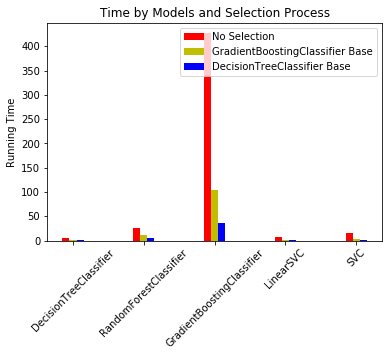

In [67]:
ind =  np.arange(5)   # the x locations for the groups
width = 0.1       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, time_o, width, color='r')
rects2 = ax.bar(ind + width, time_t2, width, color='y')
rects3 = ax.bar(ind + width + width , time_t4, width, color='b')
ax.set_ylabel('Running Time')
ax.set_title('Time by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(model_o,rotation=45)
ax.legend((rects1[0], rects2[0], rects3[0]), ('No Selection', 'GradientBoostingClassifier Base','DecisionTreeClassifier Base'))

plt.show()

In [76]:
time_test_t4=[]
model_test_t4=[]
out_accuracy_test_t4=[]

X_test_t4 = model_tree_dtc.transform(test_features)

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features_tree_dtc, y_train)
    pred=fit.predict(X_test_t4)
    elapsed = timeit.default_timer() - start_time
    time_test_t4.append(elapsed)
    model_test_t4.append(clf.__class__.__name__)
    out_accuracy_test_t4.append(accuracy_score(y_test,pred))

In [77]:
out_accuracy_test_t4

[0.84424838819138104,
 0.89311163895486934,
 0.91448931116389554,
 0.90125551408211746,
 0.89209365456396339]

#### t2

In [74]:
time_test_t2=[]
model_test_t2=[]
out_accuracy_test_t2=[]

X_test_t2 = model_en_gbc.transform(test_features)

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features_en_gbc, y_train)
    pred=fit.predict(X_test)
    elapsed = timeit.default_timer() - start_time
    time_test_t2.append(elapsed)
    model_test_t2.append(clf.__class__.__name__)
    out_accuracy_test_t2.append(accuracy_score(y_test, pred))

In [75]:
out_accuracy_test

[0.84662368510349506,
 0.91211401425178151,
 0.93892093654563968,
 0.94231421784865965,
 0.92500848320325757]

#### l1

In [78]:
time_test_l1=[]
model_test_l1=[]
out_accuracy_test_l1=[]

X_test_l1 = model_lsvc.transform(test_features)

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features_lsvc, y_train)
    pred=fit.predict(X_test_l1)
    elapsed = timeit.default_timer() - start_time
    time_test_l1.append(elapsed)
    model_test_l1.append(clf.__class__.__name__)
    out_accuracy_test_l1.append(accuracy_score(y_test,pred))

In [79]:
out_accuracy_test_l1

[0.85951815405497112,
 0.91856124872751954,
 0.91890057685782156,
 0.9491007804546997,
 0.93790295215473363]

### Find selected features

#### L1-LinearSVC

In [87]:
choosed_ar_by_l1 = model_lsvc.get_support(indices=True)

In [95]:
choosed_ar.shape

(85,)

In [97]:
choosed_ar

array([  9,  22,  25,  37,  39,  40,  41,  52,  55,  56,  57,  61,  62,
        63,  64,  65,  68,  69,  70,  77,  78,  89,  92, 102, 104, 117,
       118, 142, 145, 149, 156, 157, 158, 159, 166, 182, 185, 187, 192,
       198, 199, 209, 222, 234, 247, 274, 275, 276, 287, 291, 293, 295,
       296, 297, 300, 302, 316, 354, 366, 367, 369, 371, 374, 427, 433,
       434, 445, 448, 449, 450, 451, 452, 456, 457, 458, 459, 504, 514,
       526, 527, 537, 538, 540, 553, 556], dtype=int64)

In [90]:
for j in choosed_ar_by_l1 :
    for i in range( len(all_colums_list)) :
        if i == j :
            print(all_colums_list[i])

tBodyAcc-max()-X
tBodyAcc-entropy()-X
tBodyAcc-arCoeff()-X,1
tBodyAcc-correlation()-X,Y
tBodyAcc-correlation()-Y,Z
tGravityAcc-mean()-X
tGravityAcc-mean()-Y
tGravityAcc-min()-X
tGravityAcc-sma()
tGravityAcc-energy()-X
tGravityAcc-energy()-Y
tGravityAcc-iqr()-Z
tGravityAcc-entropy()-X
tGravityAcc-entropy()-Y
tGravityAcc-entropy()-Z
tGravityAcc-arCoeff()-X,1
tGravityAcc-arCoeff()-X,4
tGravityAcc-arCoeff()-Y,1
tGravityAcc-arCoeff()-Y,2
tGravityAcc-correlation()-X,Y
tGravityAcc-correlation()-X,Z
tBodyAccJerk-max()-X
tBodyAccJerk-min()-X
tBodyAccJerk-entropy()-X
tBodyAccJerk-entropy()-Z
tBodyAccJerk-correlation()-X,Y
tBodyAccJerk-correlation()-X,Z
tBodyGyro-entropy()-X
tBodyGyro-arCoeff()-X,1
tBodyGyro-arCoeff()-Y,1
tBodyGyro-arCoeff()-Z,4
tBodyGyro-correlation()-X,Y
tBodyGyro-correlation()-X,Z
tBodyGyro-correlation()-Y,Z
tBodyGyroJerk-mad()-X
tBodyGyroJerk-entropy()-X
tBodyGyroJerk-arCoeff()-X,1
tBodyGyroJerk-arCoeff()-X,3
tBodyGyroJerk-arCoeff()-Y,4
tBodyGyroJerk-correlation()-X,Z
tBodyGy

t2 tree-base

In [92]:
choosed_ar_by_t2 = model_en_gbc.get_support(indices=True)

In [94]:
choosed_ar_by_t2.shape

(129,)

In [96]:
choosed_ar_by_t2

array([  1,   9,  19,  22,  34,  37,  38,  39,  40,  41,  42,  46,  49,
        50,  51,  52,  53,  54,  55,  57,  58,  62,  63,  65,  66,  68,
        69,  70,  72,  73,  74,  75,  78,  80,  89,  91,  92, 100, 102,
       104, 112, 117, 120, 129, 132, 136, 138, 139, 140, 141, 142, 143,
       149, 150, 158, 159, 163, 166, 169, 177, 179, 180, 184, 186, 188,
       192, 193, 196, 197, 198, 199, 201, 206, 209, 222, 233, 249, 261,
       264, 274, 277, 290, 291, 295, 296, 300, 302, 310, 316, 318, 330,
       353, 363, 369, 371, 373, 374, 376, 397, 409, 417, 418, 429, 432,
       433, 434, 440, 448, 450, 451, 461, 474, 488, 497, 503, 504, 508,
       512, 516, 518, 521, 524, 526, 537, 544, 556, 558, 559, 560], dtype=int64)

In [93]:
for j in choosed_ar_by_t2 :
    for i in range( len(all_colums_list)) :
        if i == j :
            print(all_colums_list[i])

tBodyAcc-mean()-Y
tBodyAcc-max()-X
tBodyAcc-iqr()-X
tBodyAcc-entropy()-X
tBodyAcc-arCoeff()-Z,2
tBodyAcc-correlation()-X,Y
tBodyAcc-correlation()-X,Z
tBodyAcc-correlation()-Y,Z
tGravityAcc-mean()-X
tGravityAcc-mean()-Y
tGravityAcc-mean()-Z
tGravityAcc-mad()-X
tGravityAcc-max()-X
tGravityAcc-max()-Y
tGravityAcc-max()-Z
tGravityAcc-min()-X
tGravityAcc-min()-Y
tGravityAcc-min()-Z
tGravityAcc-sma()
tGravityAcc-energy()-Y
tGravityAcc-energy()-Z
tGravityAcc-entropy()-X
tGravityAcc-entropy()-Y
tGravityAcc-arCoeff()-X,1
tGravityAcc-arCoeff()-X,2
tGravityAcc-arCoeff()-X,4
tGravityAcc-arCoeff()-Y,1
tGravityAcc-arCoeff()-Y,2
tGravityAcc-arCoeff()-Y,4
tGravityAcc-arCoeff()-Z,1
tGravityAcc-arCoeff()-Z,2
tGravityAcc-arCoeff()-Z,3
tGravityAcc-correlation()-X,Z
tBodyAccJerk-mean()-X
tBodyAccJerk-max()-X
tBodyAccJerk-max()-Z
tBodyAccJerk-min()-X
tBodyAccJerk-iqr()-Y
tBodyAccJerk-entropy()-X
tBodyAccJerk-entropy()-Z
tBodyAccJerk-arCoeff()-Y,4
tBodyAccJerk-correlation()-X,Y
tBodyGyro-mean()-X
tBodyGyro-m